# Linear Regression Implementation

Here is the link to my source code: [Linear Regression](https://github.com/kennyerss/kennyerss.github.io/blob/main/posts/linear-reg/linear.py)

## Least-Squares Linear Regression

For this blog post, I've implemented least-squares linear regression in two ways: using the analytical method and an efficient gradient descent.

### Analytical Method

The analytical method is derived from solving the equation: $$0 = X^{T}(X \hat{w} - y)$$ 

where $X$ is our paddded feature matrix. By setting the gradient equal to $0$, we can solve for $\hat{w}$ to get an explicit solution for the optimized weight vector. Solving this equation requires $X$ to be an invertible matrix such that it has at least many rows as columns. Thus, our final solution for $\hat{w}$ is 

$$\hat{w} = (X^{T}X)^{-1} X^{T}y$$

In my `fit_analytic` method, I utilized numpy's linalg transpose and inverse methods alongside orderly matrix multiplications to calculate the optimized weight vector $\hat{w}$.

### Efficient Gradient Descent 

To implement an efficient gradient descent for least-squares linear regression, instead of computing the original gradient equation at each iteration of an epoch:

$$\nabla{L(w)} = X^{T}(Xw - y)$$

I calculated `once` $P = X^{T}X$ and $q = X^{T}y$ to reduce the time complexity of the matrix mutliplication of $X^{T}X$ being $O(np^2)$ and $X^{T}y$ being $O(np)$. Thus, reducing the gradient equation to be:

$$\nabla{L(w)} = Pw - q$$ 

reduces the time complexity of calculating the gradient to be $O(p^2)$ steps which is significantly faster! In my `fit_gradient` method, I first initialized some random weight vector of $p$ shape as my padded $X$ feature matrix. Then, I computed $P$ and $q$ which I used inside my for-loop to update my weight vector $self.w$ with the gradient. At each epoch, I calculated the `score` of the current weight vector and appended the current score to `score_history`.

# Experiments

## Demonstration

Shown below, I've generated a set of data using the `LR_data` method in my `LinearRegression` class. Then, I fit the data using both analytic and gradient descent methods and should expect a similar optimized weight vector $w$. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from linear import LinearRegression 
import numpy as np 
from matplotlib import pyplot as plt

LR = LinearRegression()

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

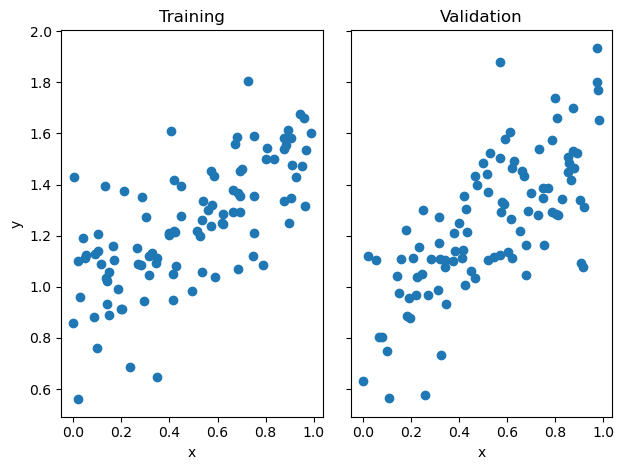

In [3]:
np.random.seed(1)

n_train = 100
n_val = 100
p_features = 1
noise = 0.2


# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

In [4]:

LR.fit_analytic(X_train, y_train) 
print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

Training score = 0.4765
Validation score = 0.4931


In [5]:
LR2 = LinearRegression()

LR2.fit_gradient(X_train, y_train, alpha = 0.01, max_iter = int(1e2))

Then, I can plot the `score_history` of the gradient descent to see how the score evolved until the max iterations. By observation, the score evolved monotonically since we're not using stochastic gradient. 

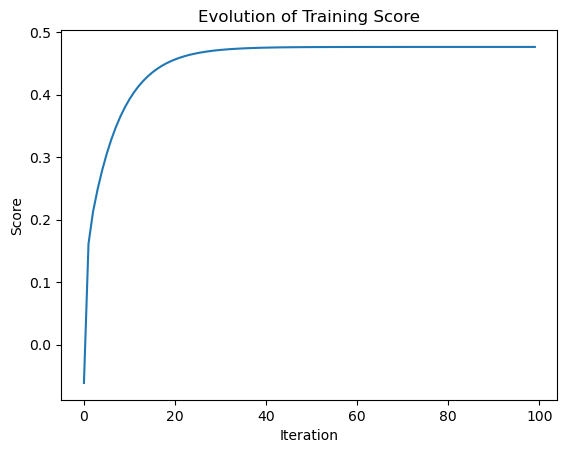

In [6]:
plt.plot(LR2.score_history)
labels = plt.gca().set(title = "Evolution of Training Score", xlabel = "Iteration", ylabel = "Score")

## Experiment 1: Increasing p_features with constant n_train

For this first experiment, I've chosen to increase the number of `p_features` to $10$, $50$, and then later choose the number of p_features to be $n-1$.

In [7]:
np.random.seed(4)

n_train = 100
n_val = 100
p_features = 10
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

In [8]:
# Use our fit_analytic method to get training and validation score
LR1 = LinearRegression()

LR1.fit_analytic(X_train, y_train) 

LR1_train_score = LR1.score(X_train, y_train).round(4)
LR1_validation_score = LR1.score(X_val, y_val).round(4)

In [9]:
np.random.seed(2)

p_features = 50
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

In [10]:
# Use our fit_analytic method to get training and validation score
LR2 = LinearRegression()

LR2.fit_analytic(X_train, y_train) 

LR2.fit_analytic(X_train, y_train) 

LR2_train_score = LR2.score(X_train, y_train).round(4)
LR2_validation_score = LR2.score(X_val, y_val).round(4)

In [11]:
np.random.seed(3)

p_features = n_train - 1 
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

In [12]:
# Use our fit_analytic method to get training and validation score
LR3 = LinearRegression()

LR3.fit_analytic(X_train, y_train) 

LR3_train_score = LR3.score(X_train, y_train).round(4)
LR3_validation_score = LR3.score(X_val, y_val).round(4)

We can visualize the training and validation scores to visibly observe the differences of each experiment as we increase the number of `p_features`.

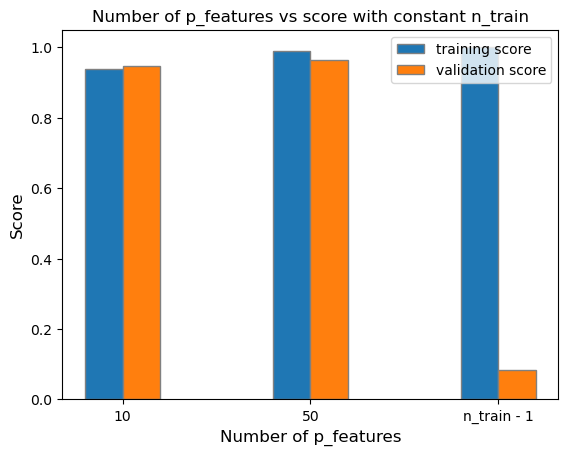

In [13]:
# Code from https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
bar_width = 0.2

training_scores = [LR1_train_score, LR2_train_score, LR3_train_score]
validation_scores = [LR1_validation_score, LR2_validation_score, LR3_validation_score]

# Set position of bar on X axis
br1 = np.arange(len(training_scores))
br2 = [x + bar_width for x in br1]

# Make the plot
plt.bar(br1, training_scores, width = bar_width,
        edgecolor ='grey', label ='training score')
plt.bar(br2, validation_scores, width = bar_width,
        edgecolor ='grey', label ='validation score')

plt.title('Number of p_features vs score with constant n_train')

# Adding Xticks
plt.xlabel('Number of p_features', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.xticks([r + 0.1 for r in range(len(training_scores))],
        ['10', '50', 'n_train - 1'])

legend = plt.legend()
plt.show()

As shown on the graph above, we can see that as the number of `p_features` increases up to `n_train - 1`, the fitted model's `training_score` also increases. However, the model's `validation score` decreases. This conclusion is related to the model being `overfit` due to the significant difference of the training and validation score between the model with `n_train - 1` p_features. This means that we've trained the model exactly to some random training data given, however, when validated on the true labels, the calculated optimized weight vector $w$ will be highly inaccurate in comparison to the labels.  

## Experiment 2: LASSO Regularization

Using LASSO regularization, we modify the original loss function to add a `regularization term`: 

$$L(w) = ||Xw - y||^{2}_{2} + \alpha||w'||_{1}$$

This extension of the regularization term minimizes the weight vector $w$ as small as it could be and forces the weight vector's entries to be *exactly* zero.

### Varying Degrees of Alpha 

For this experiment, we can choose varying degrees of *alpha* while increasing the number of `p_features` of our data. 

In [14]:
from sklearn.linear_model import Lasso

In [15]:
# Alpha of 0.001
L1 = Lasso(alpha = 0.001)

In [16]:
p_features = 10

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L1.fit(X_train, y_train)
L1_validation_1 = L1.score(X_val, y_val)

In [17]:
p_features = 50

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L1.fit(X_train, y_train)
L1_validation_2 = L1.score(X_val, y_val)

In [18]:
p_features = n_train - 1 

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L1.fit(X_train, y_train)
L1_validation_3 = L1.score(X_val, y_val)

After fitting the Lasso model with an alpha of $0.001$, we can plot its validation scores in contrast to the standard linear regression. 

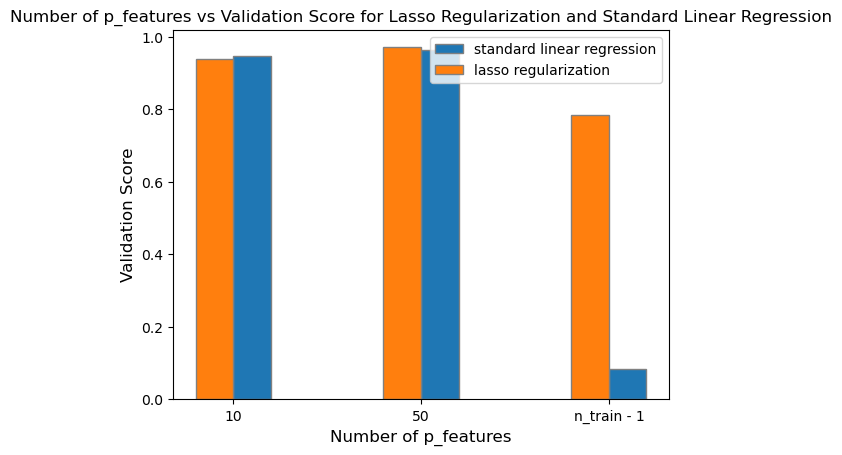

In [19]:
bar_width = 0.2

lasso_validation = [L1_validation_1, L1_validation_2, L1_validation_3]
linear_validation = [LR1_validation_score, LR2_validation_score, LR3_validation_score]

# Set position of bar on X axis
br1 = np.arange(len(lasso_validation))
br2 = [x + bar_width for x in br1]

# Make the plot
plt.bar(br2, linear_validation, width = bar_width,
        edgecolor ='grey', label ='standard linear regression')
plt.bar(br1, lasso_validation, width = bar_width,
        edgecolor ='grey', label ='lasso regularization')

plt.title('Number of p_features vs Validation Score for Lasso Regularization and Standard Linear Regression')

# Adding Xticks
plt.xlabel('Number of p_features', fontsize = 12)
plt.ylabel('Validation Score', fontsize = 12)
plt.xticks([r + 0.1 for r in range(len(lasso_validation))],
        ['10', '50', 'n_train - 1'])

legend = plt.legend()
plt.show()

In [20]:
# Alpha of 0.01
L2 = Lasso(alpha = 0.01)

In [21]:
p_features = 10

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L2.fit(X_train, y_train)
L2_validation_1 = L2.score(X_val, y_val)

In [22]:
p_features = 50

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L2.fit(X_train, y_train)
L2_validation_2 = L2.score(X_val, y_val)

In [23]:
p_features = n_train - 1

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L2.fit(X_train, y_train)
L2_validation_3 = L2.score(X_val, y_val)

After fitting the Lasso model with an alpha of $0.01$, we can plot its validation scores in contrast to the standard linear regression. 

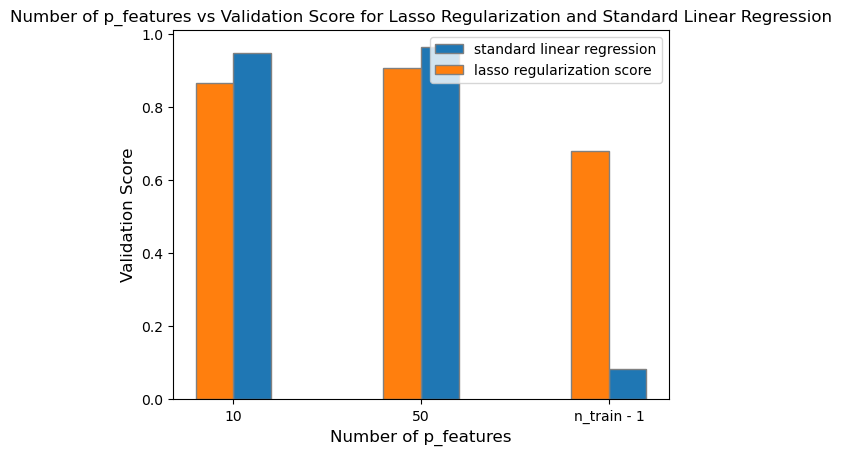

In [24]:
bar_width = 0.2

lasso_validation = [L2_validation_1, L2_validation_2, L2_validation_3]
linear_validation = [LR1_validation_score, LR2_validation_score, LR3_validation_score]

# Set position of bar on X axis
br1 = np.arange(len(lasso_validation))
br2 = [x + bar_width for x in br1]

# Make the plot
plt.bar(br2, linear_validation, width = bar_width,
        edgecolor ='grey', label ='standard linear regression')
plt.bar(br1, lasso_validation, width = bar_width,
        edgecolor ='grey', label ='lasso regularization score')

plt.title('Number of p_features vs Validation Score for Lasso Regularization and Standard Linear Regression')

# Adding Xticks
plt.xlabel('Number of p_features', fontsize = 12)
plt.ylabel('Validation Score', fontsize = 12)
plt.xticks([r + 0.1 for r in range(len(lasso_validation))],
        ['10', '50', 'n_train - 1'])

legend = plt.legend()
plt.show()

In [25]:
# Alpha of 0.1
L3 = Lasso(alpha = 0.1)

In [26]:
p_features = 10

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L3.fit(X_train, y_train)
L3_validation_1 = L3.score(X_val, y_val)

In [27]:
p_features = 50

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L3.fit(X_train, y_train)
L3_validation_2 = L3.score(X_val, y_val)

In [28]:
p_features = n_train - 1

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L3.fit(X_train, y_train)
L3_validation_3 = L3.score(X_val, y_val)

After fitting the Lasso model with an alpha of $0.1$, we can plot its validation scores in contrast to the standard linear regression. 

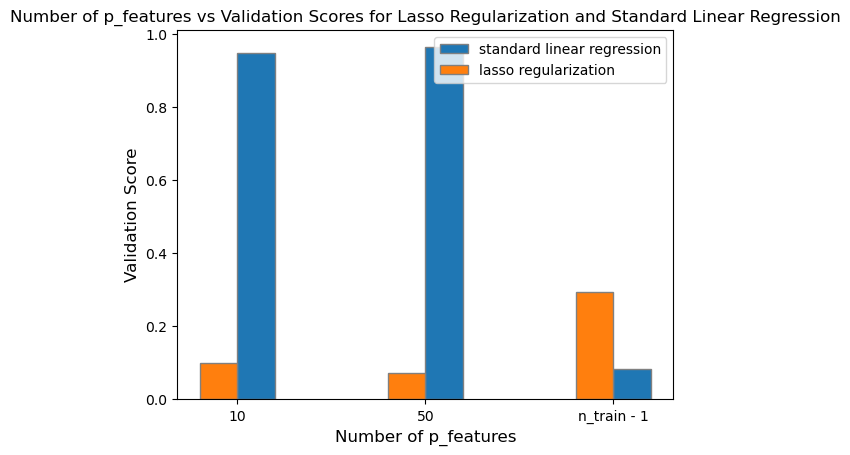

In [29]:
bar_width = 0.2

lasso_validation = [L3_validation_1, L3_validation_2, L3_validation_3]
linear_validation = [LR1_validation_score, LR2_validation_score, LR3_validation_score]

# Set position of bar on X axis
br1 = np.arange(len(lasso_validation))
br2 = [x + bar_width for x in br1]

# Make the plot
plt.bar(br2, linear_validation, width = bar_width,
        edgecolor ='grey', label ='standard linear regression')
plt.bar(br1, lasso_validation, width = bar_width,
        edgecolor ='grey', label ='lasso regularization')

plt.title('Number of p_features vs Validation Scores for Lasso Regularization and Standard Linear Regression')

# Adding Xticks
plt.xlabel('Number of p_features', fontsize = 12)
plt.ylabel('Validation Score', fontsize = 12)
plt.xticks([r + 0.1 for r in range(len(lasso_validation))],
        ['10', '50', 'n_train - 1'])

legend = plt.legend()

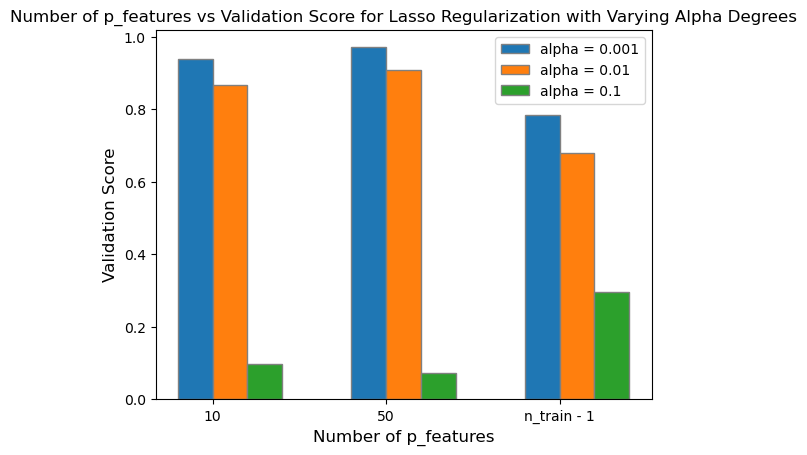

In [30]:
# Plotting all three alpha levels

bar_width = 0.2

lasso_validation_1 = [L1_validation_1, L1_validation_2, L1_validation_3]
lasso_validation_2 = [L2_validation_1, L2_validation_2, L2_validation_3]
lasso_validation_3 = [L3_validation_1, L3_validation_2, L3_validation_3]

# Set position of bar on X axis
br1 = np.arange(len(lasso_validation_1))
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]

# Make the plot
plt.bar(br1, lasso_validation_1, width = bar_width,
        edgecolor ='grey', label ='alpha = 0.001')
plt.bar(br2, lasso_validation_2, width = bar_width,
        edgecolor ='grey', label ='alpha = 0.01')
plt.bar(br3, lasso_validation_3, width = bar_width,
        edgecolor ='grey', label ='alpha = 0.1')

plt.title('Number of p_features vs Validation Score for Lasso Regularization with Varying Alpha Degrees')

# Adding Xticks
plt.xlabel('Number of p_features', fontsize = 12)
plt.ylabel('Validation Score', fontsize = 12)
plt.xticks([r + 0.1 for r in range(len(lasso_validation))],
        ['10', '50', 'n_train - 1'])

legend = plt.legend()

After plotting all three degrees of alpha with increasing number of `p_features` up to `n_train - 1`, I found that smaller values of alpha (alpha = $0.001$) will still retain a moderately high validation score despite reaching up to n_train - 1 number of p_features. However, as I increase the degree of alpha to $0.01$ and $0.1$, the difference in validation score between LASSO regularization and standard linear regression becomes significantly different. As I increase the strength of the regularizer, the validation score for LASSO regularization approaches zero, and is no longer accuracte in predicting the true labels.

In conclusion, LASSO regularization can improve a model's validation score with smaller alpha levels in contrast to utilizing standard linear regression even with up to n_train - 1 number of p_features. However, as you increase the strength of the regularization, the validation score decreases significantly, and the model is no longer proficient in its predictions. 

# Bikeshare Data Set

We can use our LinearRegression class to perform a case study over the data set related to the Capital Bikeshare system in Washington DC. 

Shown below is a preview of what the `bikeshare` data set looks like.

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
bikeshare = pd.read_csv("https://philchodrow.github.io/PIC16A/datasets/Bike-Sharing-Dataset/day.csv")

bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Here, we can plot the number of `casual` users' bike usage per day.

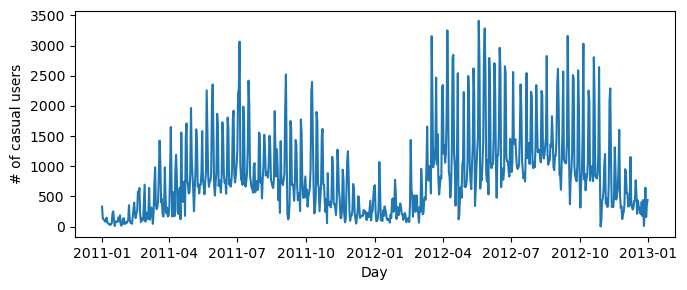

In [32]:
import datetime
fig, ax = plt.subplots(1, figsize = (7, 3))
ax.plot(pd.to_datetime(bikeshare['dteday']), bikeshare['casual'])
ax.set(xlabel = "Day", ylabel = "# of casual users")
l = plt.tight_layout()

We can simplify the data set's columns to dummy variables which we can later use in our predictions.

In [33]:
cols = ["casual", 
        "mnth", 
        "weathersit", 
        "workingday",
        "yr",
        "temp", 
        "hum", 
        "windspeed",
        "holiday"]

bikeshare = bikeshare[cols]

bikeshare = pd.get_dummies(bikeshare, columns = ['mnth'], drop_first = "if_binary")
bikeshare

,casual,weathersit,workingday,yr,temp,hum,windspeed,holiday,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,331,2,0,0,0.344167,0.805833,0.160446,0,0,0,0,0,0,0,0,0,0,0,0
1,131,2,0,0,0.363478,0.696087,0.248539,0,0,0,0,0,0,0,0,0,0,0,0
2,120,1,1,0,0.196364,0.437273,0.248309,0,0,0,0,0,0,0,0,0,0,0,0
3,108,1,1,0,0.200000,0.590435,0.160296,0,0,0,0,0,0,0,0,0,0,0,0
4,82,1,1,0,0.226957,0.436957,0.186900,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,247,2,1,1,0.254167,0.652917,0.350133,0,0,0,0,0,0,0,0,0,0,0,1
727,644,2,1,1,0.253333,0.590000,0.155471,0,0,0,0,0,0,0,0,0,0,0,1
728,159,2,0,1,0.253333,0.752917,0.124383,0,0,0,0,0,0,0,0,0,0,0,1
729,364,1,0,1,0.255833,0.483333,0.350754,0,0,0,0,0,0,0,0,0,0,0,1


Now we can do a train-test split using the dummified data set:

In [34]:
train, test = train_test_split(bikeshare, test_size = .2, shuffle = False)

X_train = train.drop(["casual"], axis = 1)
y_train = train["casual"]

X_test = test.drop(["casual"], axis = 1)
y_test = test["casual"]

After splitting the data set into training and testing data, we can now use our `LinearRegression` class to score the model on the test data:

In [35]:
X_train.shape
LR = LinearRegression()

LR.fit_analytic(X_train, y_train)
LR.score(X_test, y_test)

0.6967732383931238

We observe that our LinearRegression model does moderately well when validated on the test data as our the model predicts about $69.7$% of the true labels correctly.

Next, we can plot the predicted casual ridership vs the actual casual ridership. By observation, while the predicted casual ridership did not approximate exactly to the amount of actual casual ridership per day, we can see that the predicted casual ridership follows the same pattern of peaks and dips as the actual casual ridership.

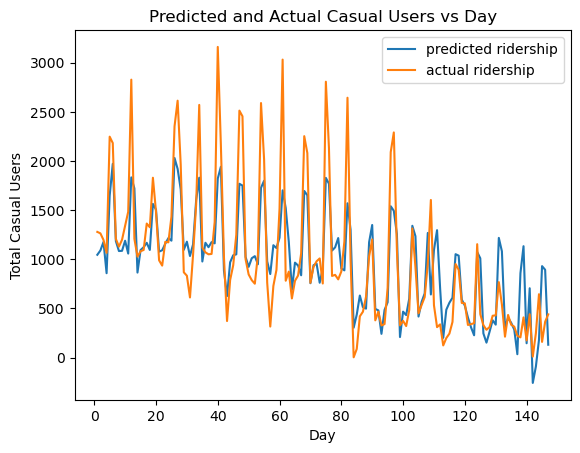

In [36]:
bike_pred = LR.predict(X_test)

num_steps = len(X_test)

# Plot bike_pred vs actual ridership
plt.plot(np.arange(num_steps) + 1, bike_pred, label = "predicted ridership")
plt.plot(np.arange(num_steps) + 1, y_test, label = "actual ridership")

plt.xlabel("Day")
plt.ylabel("Total Casual Users")
plt.title("Predicted and Actual Casual Users vs Day")

legend = plt.legend()

By looking at the entries of the model's `w` entries corresponding to the entries of `X_train.columns`, we can assess the negative and positive coefficients that best impact casual ridership per day.  

In [37]:
import pandas as pd

coefficients = np.array(LR.w[0:18])
features = np.array(X_train.columns)

dataset = pd.DataFrame({'feature': features, 'coefficients': coefficients}, columns = ['feature', 'coefficients']) 
dataset.sort_values(by=['coefficients'], ascending = False)

,feature,coefficients
3,temp,1498.715113
10,mnth_5,537.301886
9,mnth_4,518.408753
15,mnth_10,437.600848
14,mnth_9,371.503854
8,mnth_3,369.271956
11,mnth_6,360.807998
2,yr,280.586927
16,mnth_11,252.433004
13,mnth_8,241.316412


I've created a sorted dataframe containing the entries of $w$ and the corresponding coefficients to `X_train.columns`. We see that the most impactful feature is `temp` concluding that higher temperatures will have a positive increase to the number of total casual ridership by around 1500 users. Additionally the summer months all have positive coefficients which contributes to ridership. In contrast, `weathersit`, `workingday` and `holiday` contributes negatively to casual ridership, which `windspeed` is the most negative of them all.